In [1]:
file = "../DataSets Grandes/Covid19Casos.csv"
print("Datos actualizados al 8/3/21")

Datos actualizados al 8/3/21


In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
data = pd.read_csv(file)

In [4]:
data.head(4)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-03-08
1,1000002,M,22.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2021-03-08
2,1000003,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2021-03-08
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2021-03-08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111699 entries, 0 to 7111698
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [55]:
data.clasificacion.value_counts()

Caso Descartado                                                                              3966620
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        1614708
Caso con resultado negativo-no conclusivo - No activo                                         203236
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)     185173
Caso sospechoso - No Activo - Con muestra sin resultado concluyente                           124478
Caso sospechoso - No Activo - Sin muestra                                                     116532
Caso confirmado por laboratorio - Activo Internado                                            107226
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                        61552
Caso confirmado por laboratorio - Fallecido                                                    50314
Caso confirmado por laboratorio - Activo                                                   

In [6]:
data.isnull().sum()

id_evento_caso                            0
sexo                                      0
edad                                   3903
edad_años_meses                           0
residencia_pais_nombre                    0
residencia_provincia_nombre               0
residencia_departamento_nombre            0
carga_provincia_nombre                    0
fecha_inicio_sintomas               4239897
fecha_apertura                            1
sepi_apertura                             0
fecha_internacion                   6843456
cuidado_intensivo                         0
fecha_cui_intensivo                 7068275
fallecido                                 0
fecha_fallecimiento                 7047527
asistencia_respiratoria_mecanica          0
carga_provincia_id                        0
origen_financiamiento                     0
clasificacion                             1
clasificacion_resumen                     0
residencia_provincia_id                   0
fecha_diagnostico               

In [7]:
data.shape

(7111699, 25)

In [56]:
data.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [8]:
data = data.drop(columns = ["carga_provincia_id","residencia_provincia_id","residencia_departamento_id","id_evento_caso","asistencia_respiratoria_mecanica","fecha_inicio_sintomas","fecha_internacion"])

In [9]:
data.shape

(7111699, 18)

In [10]:
data.head(5)

,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion
0,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Privado,Caso Descartado,Descartado,2020-06-09,2021-03-08
1,M,22.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2020-06-01,2021-03-08
2,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-06-01,23,NO,NaN,NO,NaN,Privado,Caso Descartado,Descartado,2020-06-01,2021-03-08
3,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,2020-06-01,23,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2020-06-01,2021-03-08
4,M,29.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,NaN,2021-03-08


In [172]:
#data.fecha_diagnostico.dropna(inplace=True)

In [15]:
data.clasificacion_resumen[data.fecha_diagnostico.isna()==False].value_counts()

Descartado    4371696
Confirmado    1963707
Sospechoso     268567
Name: clasificacion_resumen, dtype: int64

In [16]:
#Regex
caso_conf = "Caso confirmado"
caso_sosp = "Caso sospechoso"
caso_desc = "Caso Descartado"
reg_caso_conf = re.compile(caso_conf)
reg_caso_sosp = re.compile(caso_sosp)
reg_caso_desc = re.compile(caso_desc)

In [17]:
re.findall(reg_caso_conf,data.clasificacion[2030])

['Caso confirmado']

In [18]:
re.findall(caso_desc,data.clasificacion[0])

['Caso Descartado']

In [29]:
print (caso_conf in data.clasificacion[0])
print (caso_desc in data.clasificacion[0])

False
True


In [31]:
data.clasificacion_resumen.value_counts()

Descartado        4381802
Confirmado        2154694
Sospechoso         575085
Sin Clasificar        118
Name: clasificacion_resumen, dtype: int64

In [32]:
print ("Mortalidad entre los casos positivos:")
data.fallecido[data.clasificacion_resumen=="Confirmado"].value_counts(normalize=True)

Mortalidad entre los casos positivos:


NO    0.975346
SI    0.024654
Name: fallecido, dtype: float64

In [33]:
data.edad[data.edad>110].value_counts()

121.0     355
221.0      42
120.0      33
111.0      12
119.0       4
113.0       3
112.0       2
1944.0      2
1826.0      1
118.0       1
115.0       1
117.0       1
1024.0      1
131.0       1
Name: edad, dtype: int64

In [34]:
data.drop(index=data.edad[data.edad>110].index, inplace=True)

In [ ]:
#plt.hist(data.estado(data.estado==casosconf),cumulative=True, density=True, bins=30)

In [35]:
tot = pd.Series(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"].value_counts()).sort_values()
tot = tot[tot.index > '2020-01-01']

In [36]:
cumsum_tot = tot.sort_index().cumsum().sort_values()
cumsum_tot = cumsum_tot[cumsum_tot.index > '2020-01-01']

In [37]:
data.fecha_apertura.values[0]

'2020-06-01'

In [45]:
pd.qcut(pd.to_datetime(cumsum_tot.index),20)[0]

Interval('2020-01-01 23:59:59.999999999', '2020-02-16', closed='right')

In [46]:
pd.cut(pd.to_datetime(cumsum_tot.index),20)[0]

Interval('2020-01-01 13:39:21.600000', '2020-01-23 13:12:00', closed='right')

In [69]:
cumsum_tot.index = pd.to_datetime(cumsum_tot.index, format="%Y/%m/%d")

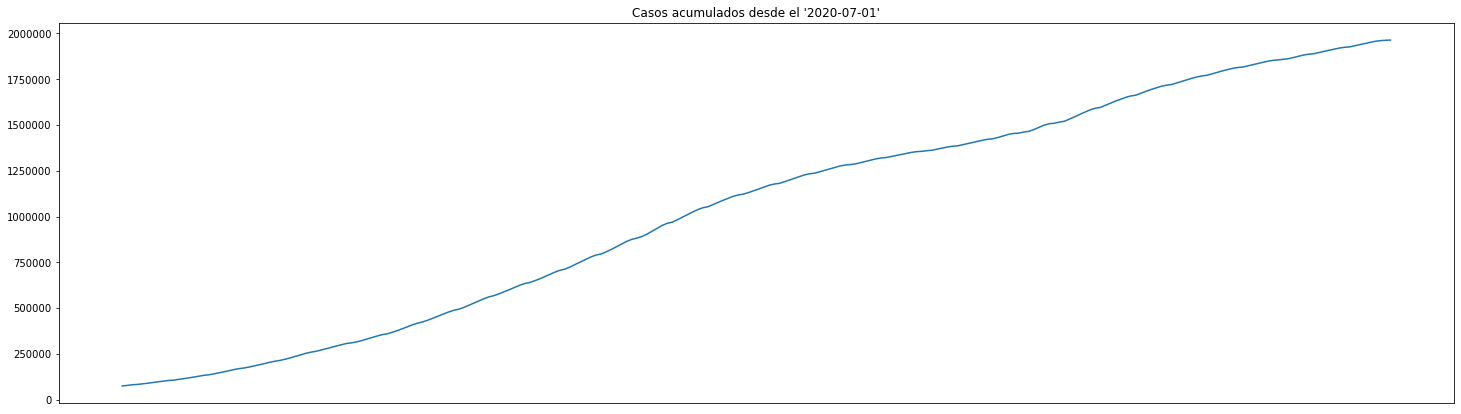

In [51]:
# Plot
x = cumsum_tot[cumsum_tot.index > '2020-07-01'].index
y = cumsum_tot[cumsum_tot.index > '2020-07-01']
plt.figure(figsize = (25,7))
plt.plot(x, y)#labels=['Casos confirmados','Casos totales'])
#plt.legend(loc='upper left')
plt.title("Casos acumulados desde el '2020-07-01'")
plt.ticklabel_format(style='plain', axis="y")
plt.xticks(ticks=[])
plt.show()

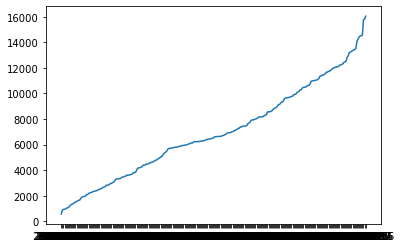

Hoy en día, +16000 casos confirmados por día


In [54]:
plt.plot(tot[tot.index > '2020-06-01'])
#plt.figure(figsize = (18,6))
plt.show()
print("Hoy en día, +16000 casos confirmados por día")

In [64]:
xticks = pd.to_datetime(["2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01"])

In [132]:
prim_trim_inf = tot.index[tot.index > '2020-06-01'].sort_values()
prim_trim_sup = tot.index[tot.index < '2020-09-01'].sort_values()
seg_trim_inf = tot.index[tot.index > '2020-09-01'].sort_values()
seg_trim_sup = tot.index[tot.index < '2020-12-01'].sort_values()
ter_trim_inf = tot.index[tot.index > '2020-12-01'].sort_values()
#ter_trim_sup = tot.index > '2020-12-01'

In [138]:
pd.Series(tot[ter_trim_inf])[10:]

2020-12-12    4170
2020-12-13    2367
2020-12-14    5915
2020-12-15    6240
2020-12-16    6118
              ... 
2021-03-04    5926
2021-03-05    5823
2021-03-06    3673
2021-03-07    1899
2021-03-08    1224
Name: fecha_diagnostico, Length: 87, dtype: int64

In [96]:
data.clasificacion_resumen[data.fecha_apertura == "2021-03-08"].value_counts()

Descartado    10308
Sospechoso     3785
Confirmado     1884
Name: clasificacion_resumen, dtype: int64

In [97]:
data.clasificacion_resumen[data.fecha_diagnostico == "2021-03-08"].value_counts()

Descartado    4123
Confirmado    1224
Sospechoso     921
Name: clasificacion_resumen, dtype: int64

In [102]:
data.fecha_fallecimiento[data.fecha_fallecimiento == "2021-03-08"].value_counts()

2021-03-08    6
Name: fecha_fallecimiento, dtype: int64

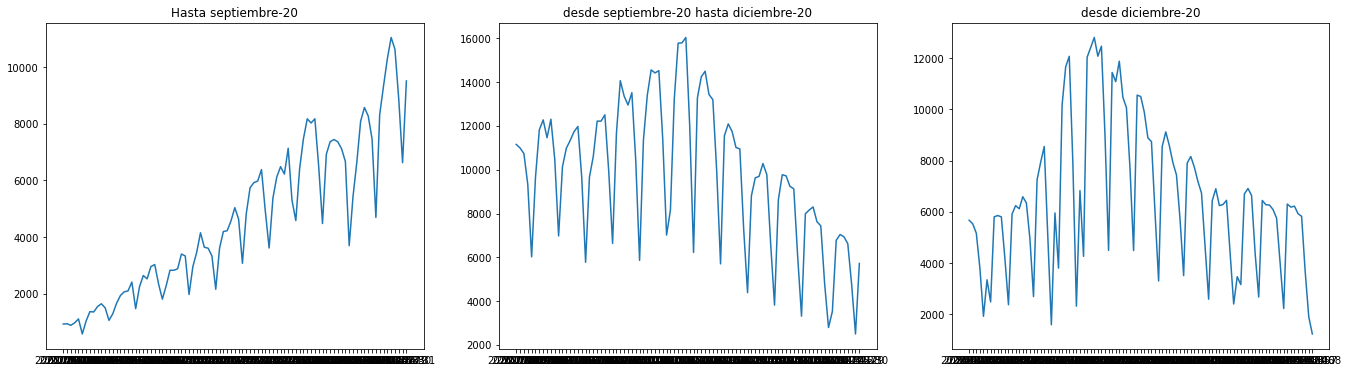

In [139]:
plt.figure(figsize = (23,6))
plt.subplot(1, 3, 1)
plt.title("Hasta septiembre-20")
#plt.xticks(ticks=xticks)
plt.plot(tot[prim_trim_inf&prim_trim_sup])
plt.subplot(1, 3, 2)
plt.title("desde septiembre-20 hasta diciembre-20")
plt.plot(tot[seg_trim_inf&seg_trim_sup])
plt.subplot(1, 3, 3)
plt.title("desde diciembre-20")
plt.plot(tot[ter_trim_inf])

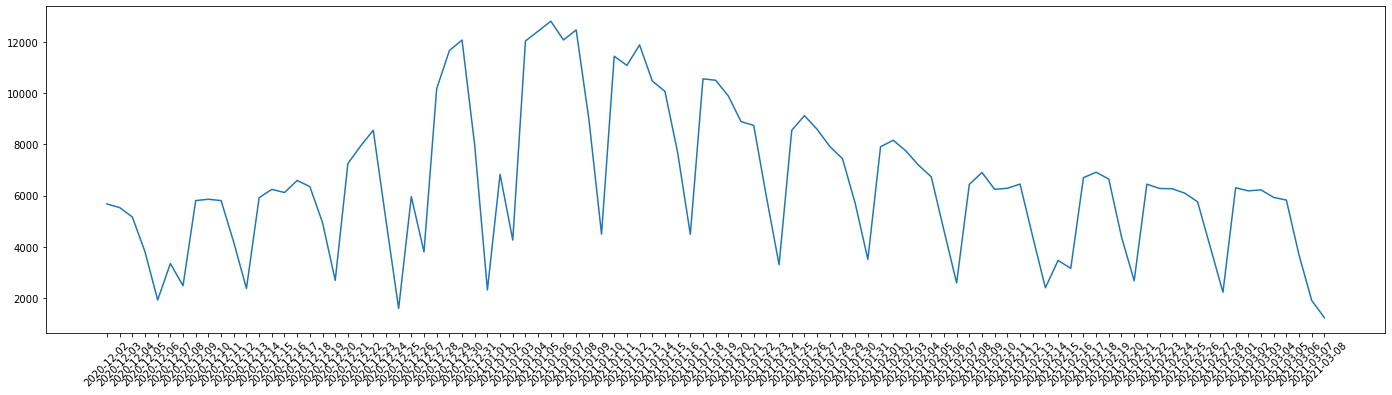

In [137]:
plt.figure(figsize = (24,6))
plt.xticks(rotation=45)
plt.plot(tot[ter_trim_inf])

In [170]:
dia15 = []
for i in range(0,len(cumsum_tot.index)):
    if "15" in str(cumsum_tot.index[i]):
        dia15.append(cumsum_tot.index[i])
    #[x for x in cumsum.index if "15" in str(cumsum.index[i])]

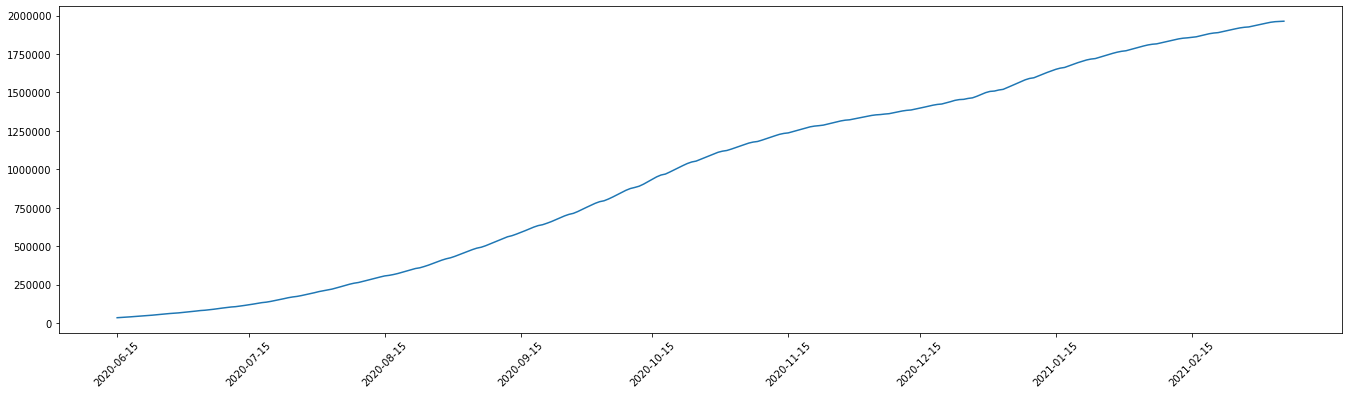

In [174]:
x = cumsum_tot[cumsum_tot.index>"2020-06-14"].index
y = cumsum_tot[cumsum_tot.index>"2020-06-14"]
plt.figure(figsize = (23,6))
plt.plot(x, y)#labels=['Casos confirmados','Casos totales'])
plt.xticks(dia15[4:], rotation=45)
#plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis="y")
plt.show()

In [192]:
#data.fecha_diagnostico.dropna(inplace=True)

In [276]:
mdata = pd.to_datetime(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"]).dt.month
mdata.dropna(inplace=True)
mdata = mdata.astype(str)

In [277]:
mcordata = []
for x in mdata:
    mcordata.append(x.replace(".0",""))

In [278]:
adata = pd.to_datetime(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"]).dt.year
adata.dropna(inplace=True)
adata= adata.astype(str)

In [279]:
acordata = []
for x in adata:
    acordata.append(x.replace(".0",""))

In [280]:
data["Date"] = pd.Series(acordata)+"_"+pd.Series(mcordata)

In [281]:
data_graf = data["Date"].dropna()
data_graf

0          2020_6
1          2020_6
2          2020_5
3          2020_6
4          2020_5
            ...  
1963532    2020_6
1963533    2020_9
1963534    2020_6
1963535    2020_6
1963536    2020_6
Name: Date, Length: 1963371, dtype: object

In [282]:
data[["fecha_diagnostico","Date"]][data.clasificacion_resumen == "Confirmado"].groupby("fecha_diagnostico").sum()

,Date
fecha_diagnostico,
2002-10-09,0
2002-10-11,0
2002-10-21,0
2002-11-09,0
2012-09-21,2021_1
...,...
2021-03-04,NaN
2021-03-05,NaN
2021-03-06,NaN


In [283]:
data_graf = pd.to_datetime(data_graf, format="%Y_%m")
data_graf = pd.DataFrame(data_graf)
data_graf["ano"] = pd.Series
data_graf["ano"] = data_graf["Date"].dt.year
data_graf["mes"] = data_graf["Date"].dt.month
data_graf = data_graf[data_graf.ano>=2019]

In [284]:
count = data_graf.groupby([data_graf["ano"],data_graf.mes]).count().rename({"Date":"Cant"},axis="columns")#.sort_values(by="Date",axis=0)
#count = count[count.Cant > 1]
count

Cant
ano  mes        
2019 3         1
     9         1
     10        7
     11        1
2020 1        62
     2         8
     3      1084
     4      3395
     5     12868
     6     51234
     7    135675
     8    229416
     9    318620
     10   365535
     11   209801
     12   178929
2021 1    264490
     2    154990
     3     37249

In [285]:
count.query("ano==2019")

Cant
ano  mes      
2019 3       1
     9       1
     10      7
     11      1

In [286]:
count.query("ano==2020")

Cant
ano  mes        
2020 1        62
     2         8
     3      1084
     4      3395
     5     12868
     6     51234
     7    135675
     8    229416
     9    318620
     10   365535
     11   209801
     12   178929

In [287]:
count.query("ano==2021")

Cant
ano  mes        
2021 1    264490
     2    154990
     3     37249

In [288]:
cant_2019 = pd.DataFrame(count.query("ano==2019"))
cant_2020 = pd.DataFrame(count.query("ano==2020"))
cant_2021 = pd.DataFrame(count.query("ano==2021"))

<AxesSubplot:xlabel='ano,mes'>

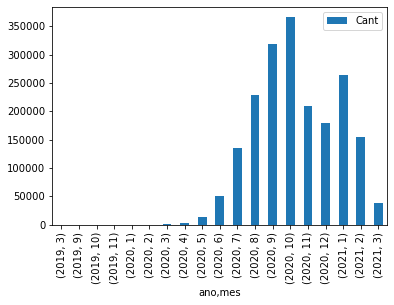

In [289]:
count.plot(kind="bar")

In [293]:
data.fecha_diagnostico = pd.to_datetime(data.fecha_diagnostico,infer_datetime_format=True)

In [290]:
data.fecha_diagnostico.isna().value_counts()

False    6603553
True      507687
Name: fecha_diagnostico, dtype: int64

In [267]:
today = datetime.strftime(datetime.date(datetime.today()),"%Y-%m-%d")

In [205]:
per_15d = datetime.strftime(datetime.date(datetime.today()-timedelta(days=15)),"%Y-%m-%d")
per_15d

'2021-02-22'

In [216]:
activos = data[data.fecha_diagnostico>=per_15d]
activos = activos.loc[:,["sexo","edad","edad_años_meses","carga_provincia_nombre","fallecido","clasificacion","clasificacion_resumen"]]
activos = activos[activos.clasificacion_resumen == "Confirmado"]
activos.head(5)

,sexo,edad,edad_años_meses,carga_provincia_nombre,fallecido,clasificacion,clasificacion_resumen
1518,F,26.0,Años,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
2917,M,31.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
4574,F,32.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
5640,F,46.0,Años,Córdoba,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
5915,M,30.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
...,...,...,...,...,...,...,...
7092466,M,35.0,Años,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
7093746,F,22.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
7096690,F,71.0,Años,La Rioja,NO,Caso confirmado por laboratorio - No Activo po...,Confirmado
7099010,M,23.0,Años,Chaco,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado


In [294]:
activos.fallecido.value_counts()

NO    67613
SI      230
Name: fallecido, dtype: int64

In [301]:
data.fallecido.loc[(data.clasificacion_resumen=="Descartado") | (data.clasificacion_resumen=="Sospechoso")].value_counts()

NO    4945561
SI      11050
Name: fallecido, dtype: int64

In [295]:
pd.cut(activos.edad,5).value_counts(normalize=True)

(21.4, 42.8]      0.448988
(42.8, 64.2]      0.307251
(-0.107, 21.4]    0.128632
(64.2, 85.6]      0.104132
(85.6, 107.0]     0.010997
Name: edad, dtype: float64

In [212]:
pd.cut(data.edad,5).value_counts(normalize=True)

(22.0, 44.0]     0.486643
(44.0, 66.0]     0.262344
(-0.11, 22.0]    0.162520
(66.0, 88.0]     0.079768
(88.0, 110.0]    0.008724
Name: edad, dtype: float64

In [220]:
activos.sexo.value_counts(normalize=True)

F     0.501098
M     0.491768
NR    0.007134
Name: sexo, dtype: float64

In [302]:
activos.clasificacion.value_counts()

Caso confirmado por laboratorio - Activo                                                     33260
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        30977
Caso confirmado por laboratorio - Activo Internado                                            2737
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                        272
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)      262
Caso confirmado por laboratorio - Fallecido                                                    230
Caso confirmado por criterio clinico-epidemiol¿gico - Activo                                    89
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                       16
Name: clasificacion, dtype: int64

In [222]:
activos.head(5)

,sexo,edad,edad_años_meses,carga_provincia_nombre,fallecido,clasificacion,clasificacion_resumen
1518,F,26.0,Años,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
2917,M,31.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
4574,F,32.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
5640,F,46.0,Años,Córdoba,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
5915,M,30.0,Años,Buenos Aires,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado


In [303]:
print ("Las provincias que más casos activos tienen son:")
activos.carga_provincia_nombre.value_counts()[:5]

Las provincias que más casos activos tienen son:


Buenos Aires    22822
CABA            12858
Córdoba          7148
Santa Fe         4535
Corrientes       2118
Name: carga_provincia_nombre, dtype: int64

In [239]:
print ("Cantidad de casos confirmados en últimos 15 días:",activos.carga_provincia_nombre.count())
print ("Cantidad de casos analizados en últimos 15 días:",data[data.fecha_diagnostico>per_15d].shape[0])
print ("Lo que representa un",round(activos.carga_provincia_nombre.count()/data[data.fecha_diagnostico>per_15d].shape[0],2),"% de casos positivos sobre los testeos realizados")

Cantidad de casos confirmados en últimos 15 días: 67843
Cantidad de casos analizados en últimos 15 días: 400108
Lo que representa un 0.17 % de los testeos realizados


In [258]:
print ("Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el:", today)
round(data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].value_counts()/data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].count()*100,2)[:5]

Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el 08/3:


CABA            40.75
Buenos Aires    19.27
Córdoba         11.44
Santa Fe         4.57
Tucumán          2.65
Name: carga_provincia_nombre, dtype: float64

In [259]:
print ("Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el:", today)
round(activos.carga_provincia_nombre.value_counts()/activos.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el 08/3:


Buenos Aires    33.64
CABA            18.95
Córdoba         10.54
Santa Fe         6.68
Corrientes       3.12
Name: carga_provincia_nombre, dtype: float64

In [261]:
print ("Porcentaje de casos analizados en total por provincia hasta el:", today)
round(data.carga_provincia_nombre.value_counts()/data.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos analizados en total por provincia:


CABA            29.63
Buenos Aires    26.83
Córdoba         11.24
Santa Fe         6.41
Tucumán          3.29
Mendoza          2.69
Name: carga_provincia_nombre, dtype: float64

In [271]:
print ("Porcentaje de casos confirmados por provincia sobre total hasta el:", today)
round(data[data.clasificacion_resumen=="Confirmado"].carga_provincia_nombre.value_counts()/data[data.clasificacion_resumen=="Confirmado"].carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre total hasta el: 2021-03-09


Buenos Aires    35.07
CABA            17.82
Santa Fe        10.30
Córdoba          7.55
Tucumán          3.77
Name: carga_provincia_nombre, dtype: float64